The musical pitch of a note is determined by its fundamental frequency. The pitch played by different instruments sounds different due to harmonics, i.e. other frequencies that are superimposed and determine the timbre of the instrument. This dataset contains samples from several instruments playing different notes. Plot the spectrogram for some of them (4 instruments are sufficient) and check if it is possible to recognize the different instruments by only looking at the spectrogram. In your presentation, discuss which samples you chose to compare, how you computed the spectrogram and whether the resulting features are sufficient to recognize the instrument.

In Python you can import WAVs (and acces several other music-related functions), using the LibROSA library.


In [12]:
import matplotlib.pyplot as plt
import numpy as np

import os
import zipfile

import librosa
import librosa.display

import warnings #pysoundfile does not work, so librosa uses audioread that send a warning
warnings.filterwarnings('ignore')

In [13]:
dataset_path = './all-samples/'
instruments = [i for i in os.listdir(dataset_path) if i.endswith('.zip')]
print(instruments)

['banjo.zip', 'bass clarinet.zip', 'bassoon.zip', 'cello.zip', 'clarinet.zip', 'contrabassoon.zip', 'cor anglais.zip', 'double bass.zip', 'flute.zip', 'french horn.zip', 'guitar.zip', 'mandolin.zip', 'oboe.zip', 'percussion.zip', 'saxophone.zip', 'trombone.zip', 'trumpet.zip', 'tuba.zip', 'viola.zip', 'violin.zip']


In [14]:
for instrument in instruments:
  zip_path = dataset_path+f"{instrument}"
  path_to_extract_to = zip_path[:-4]+"/"
  
  if not os.path.exists(path_to_extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall(path_to_extract_to)


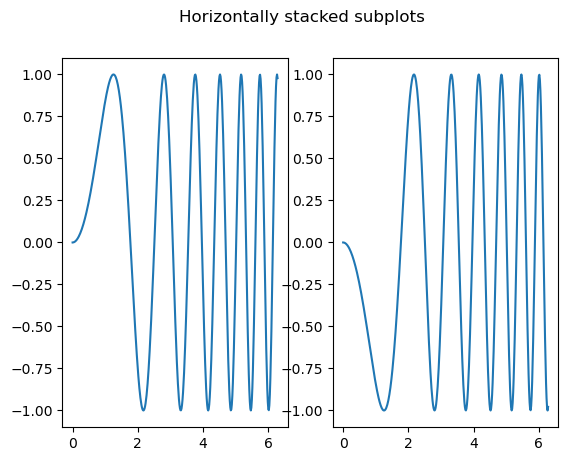

In [15]:
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')

ax1.plot(x, y)
ax2.plot(x, -y)


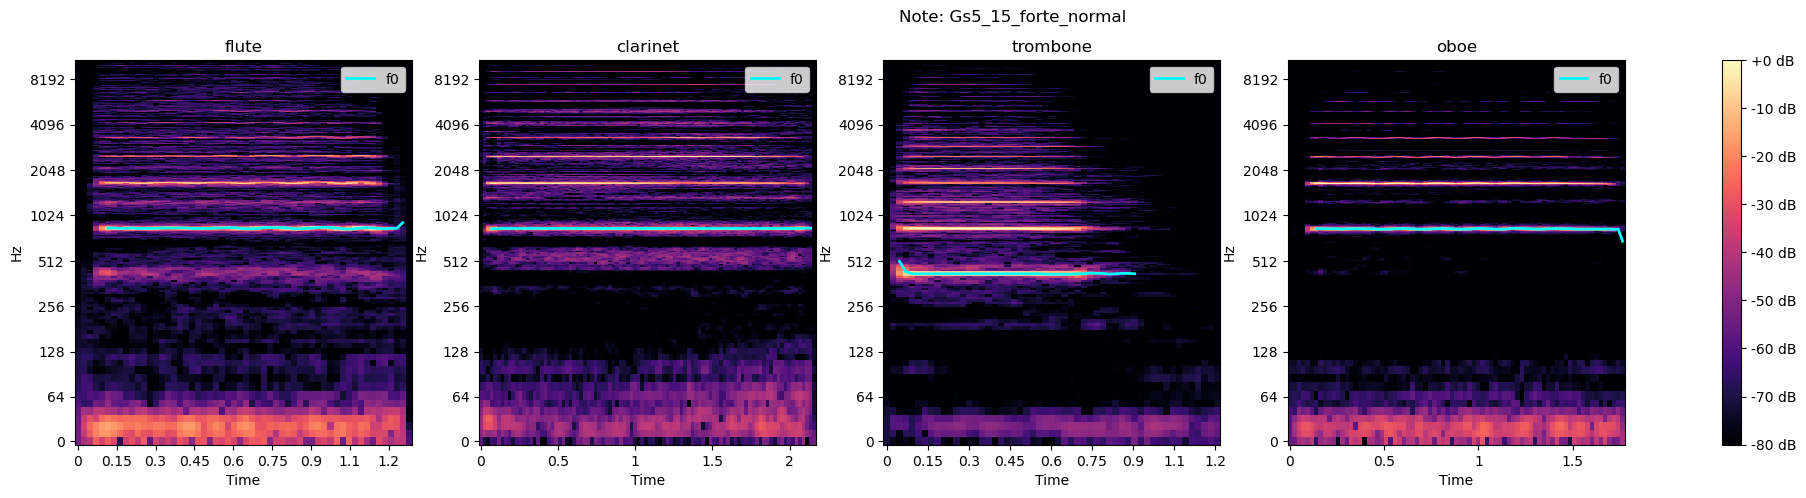

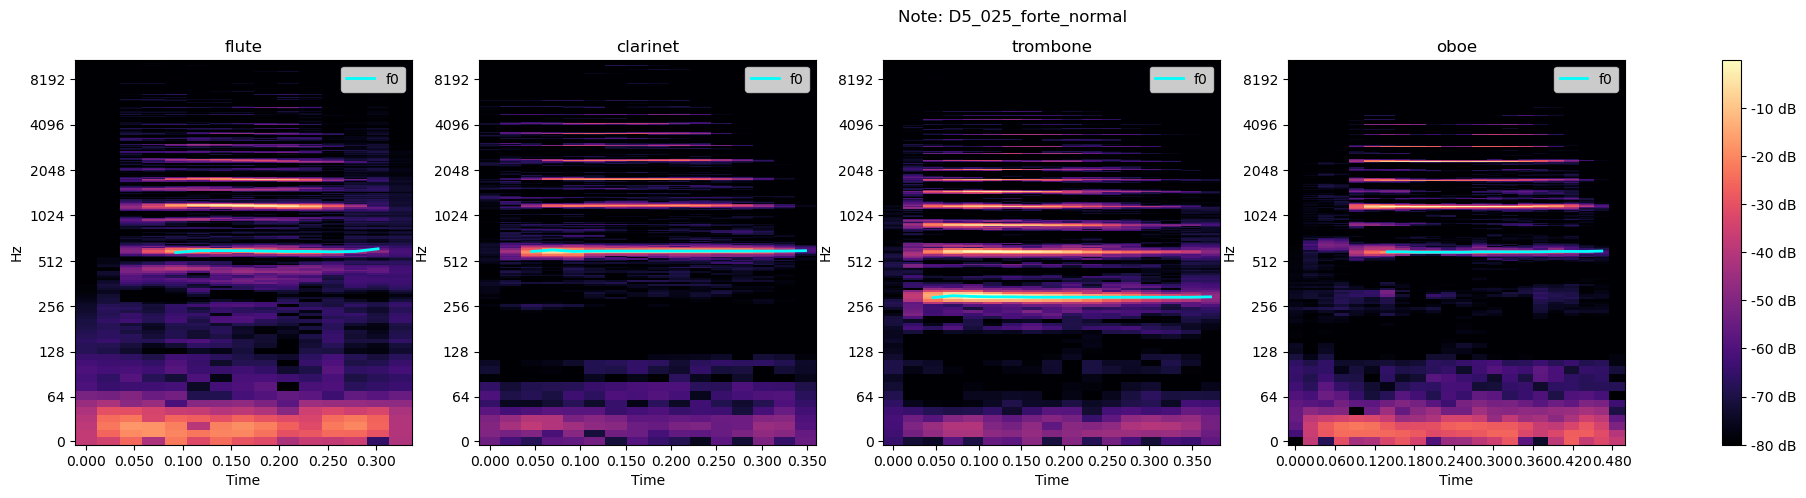

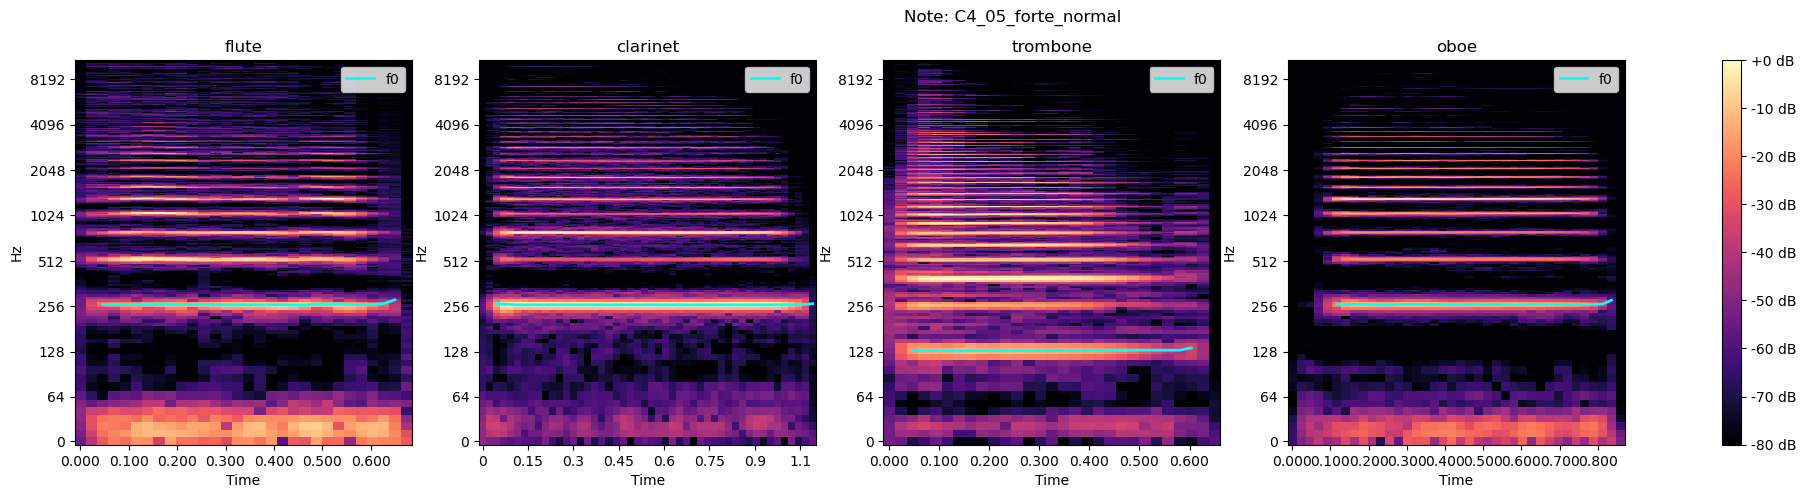

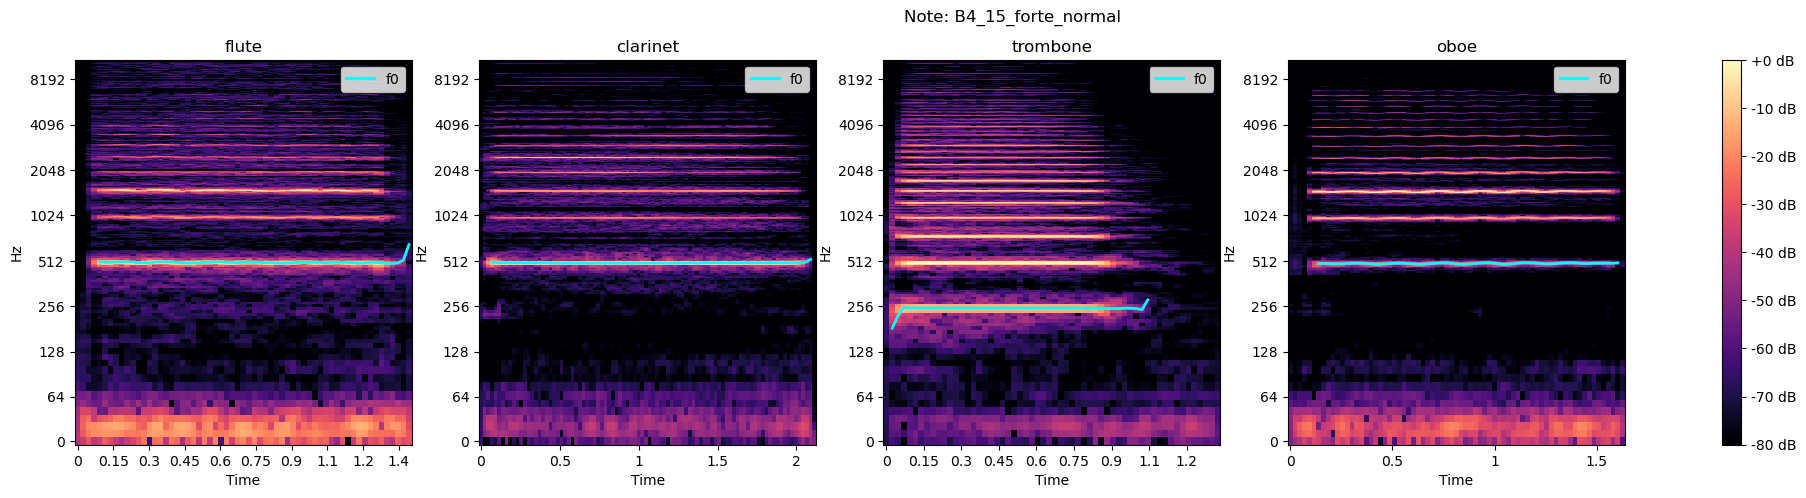

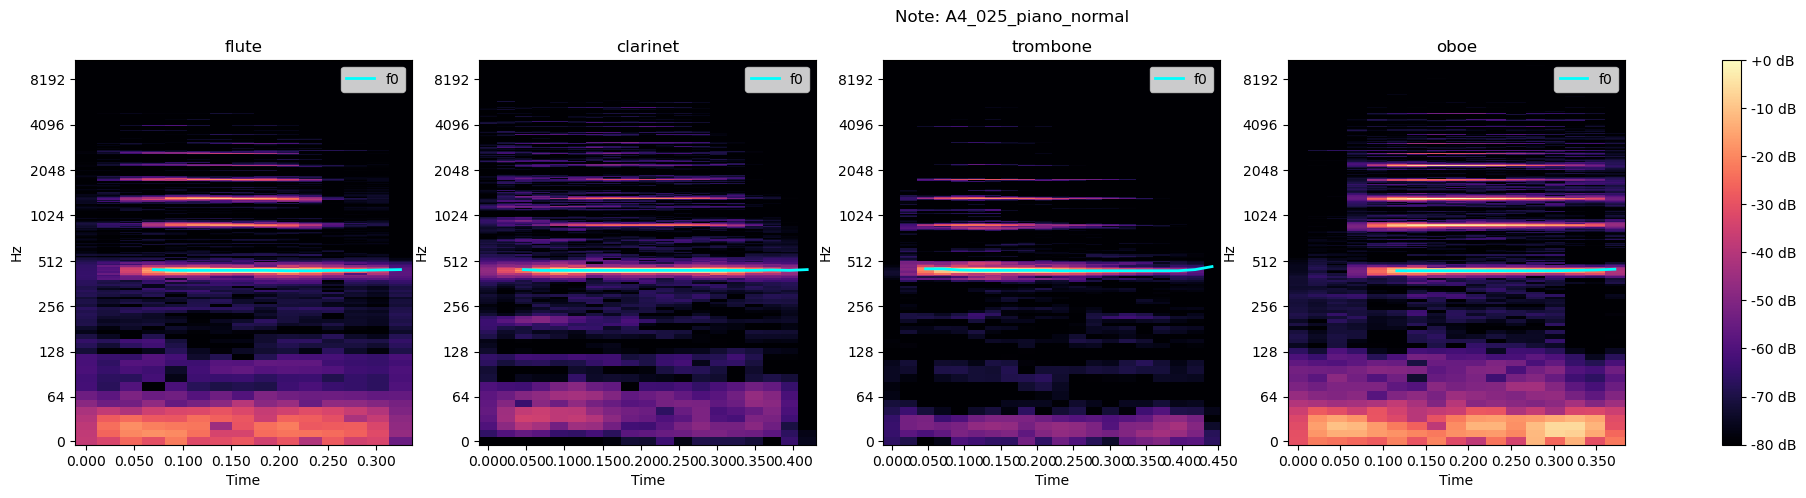

In [18]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

instruments = ["flute", "clarinet", "trombone", "oboe"]
notes = ["Gs5_15_forte_normal","D5_025_forte_normal", "C4_05_forte_normal", "B4_15_forte_normal", "A4_025_piano_normal"] 

for note in notes: 
  fig, ax = plt.subplots(nrows=1, ncols=len(instruments), figsize=(25,5))
  fig.suptitle(f'Note: {note}')

  for index, instrument in enumerate(instruments):
    path = dataset_path+f"{instrument}/{instrument}_{note}.mp3"
    ax[index].set_title(instrument)
    
    y, sr = librosa.load(path)
    
    # fundamental note
    f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C7'))
    times = librosa.times_like(f0)

    # STFT of y
    D = np.abs(librosa.stft(y))
    
    # harmonic decomposition
    H, P = librosa.decompose.hpss(D)
   
    power = librosa.power_to_db(H**2, ref=np.max)


    img = librosa.display.specshow(power,
                         y_axis='log', x_axis='time', ax=ax[index])
    
    
    ax[index].plot(times, f0, label='f0', color='cyan', linewidth=2)
    ax[index].legend(loc='upper right')


  fig.colorbar(img, ax=ax, format="%+2.f dB")



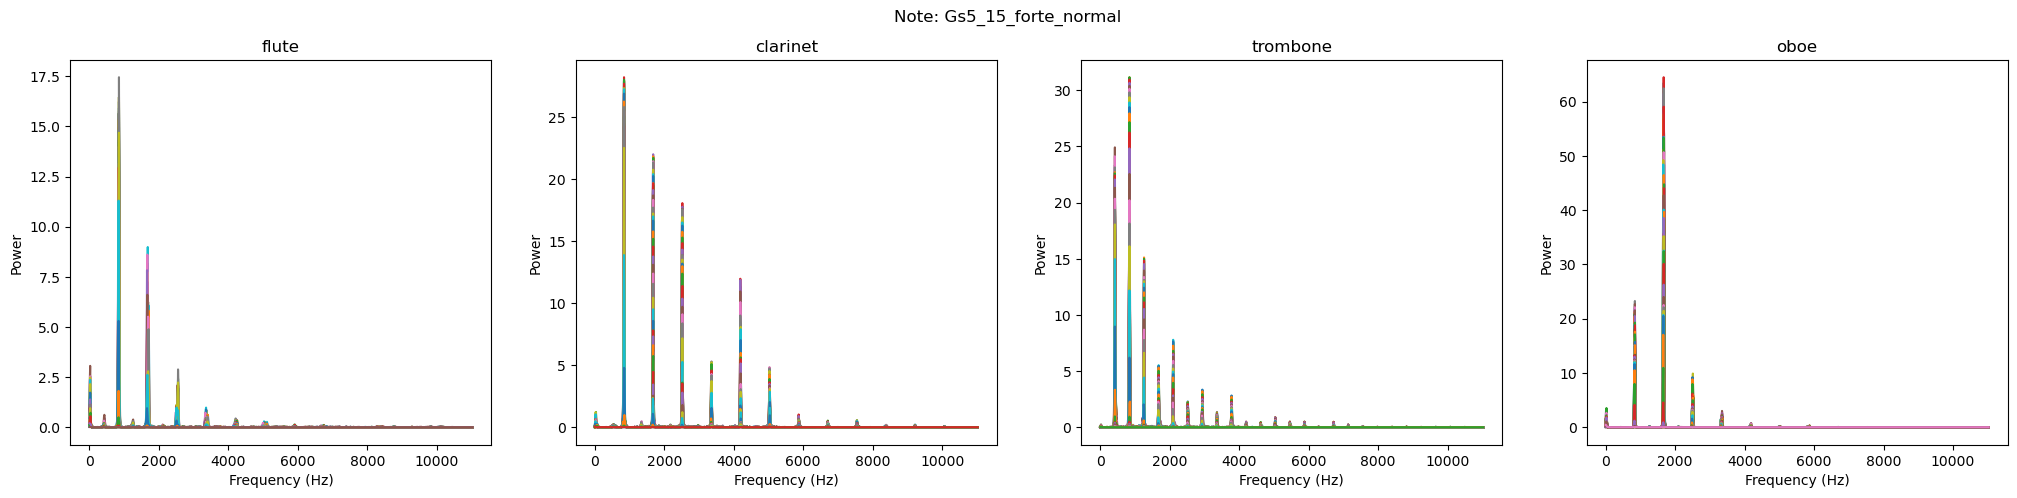

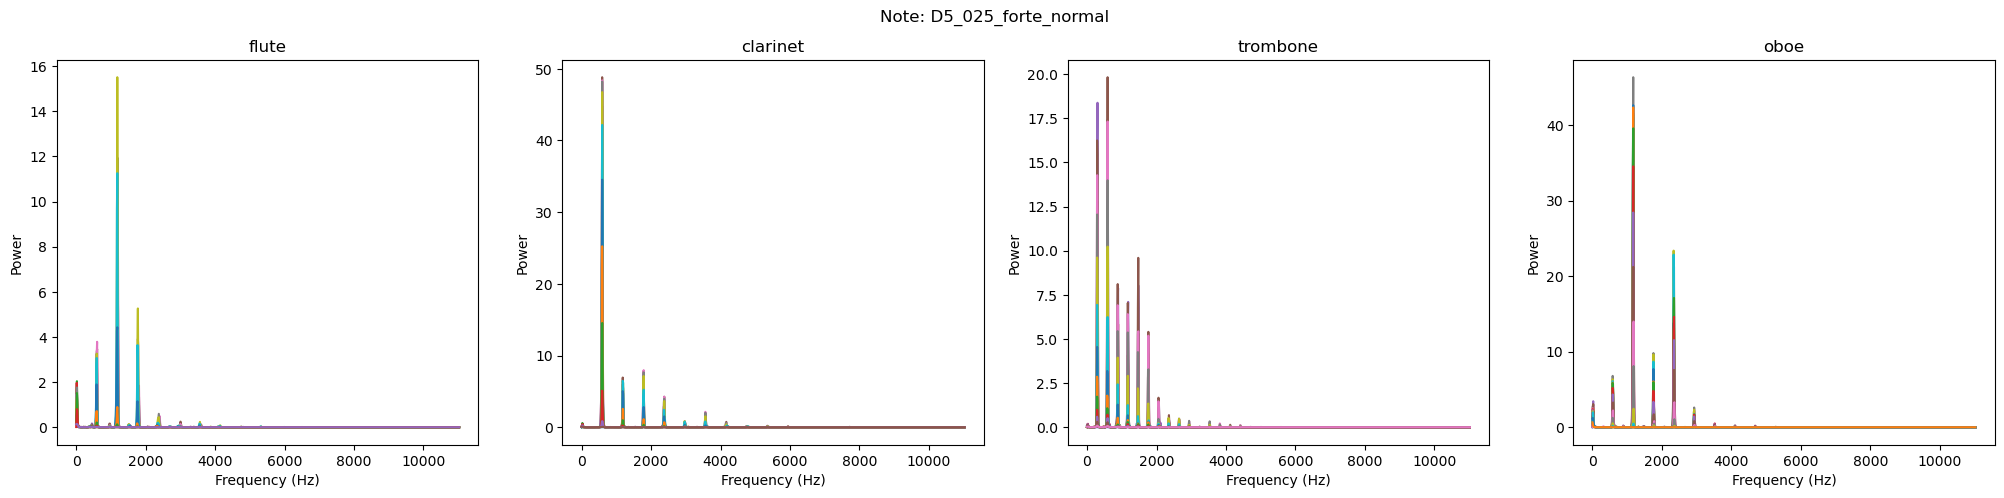

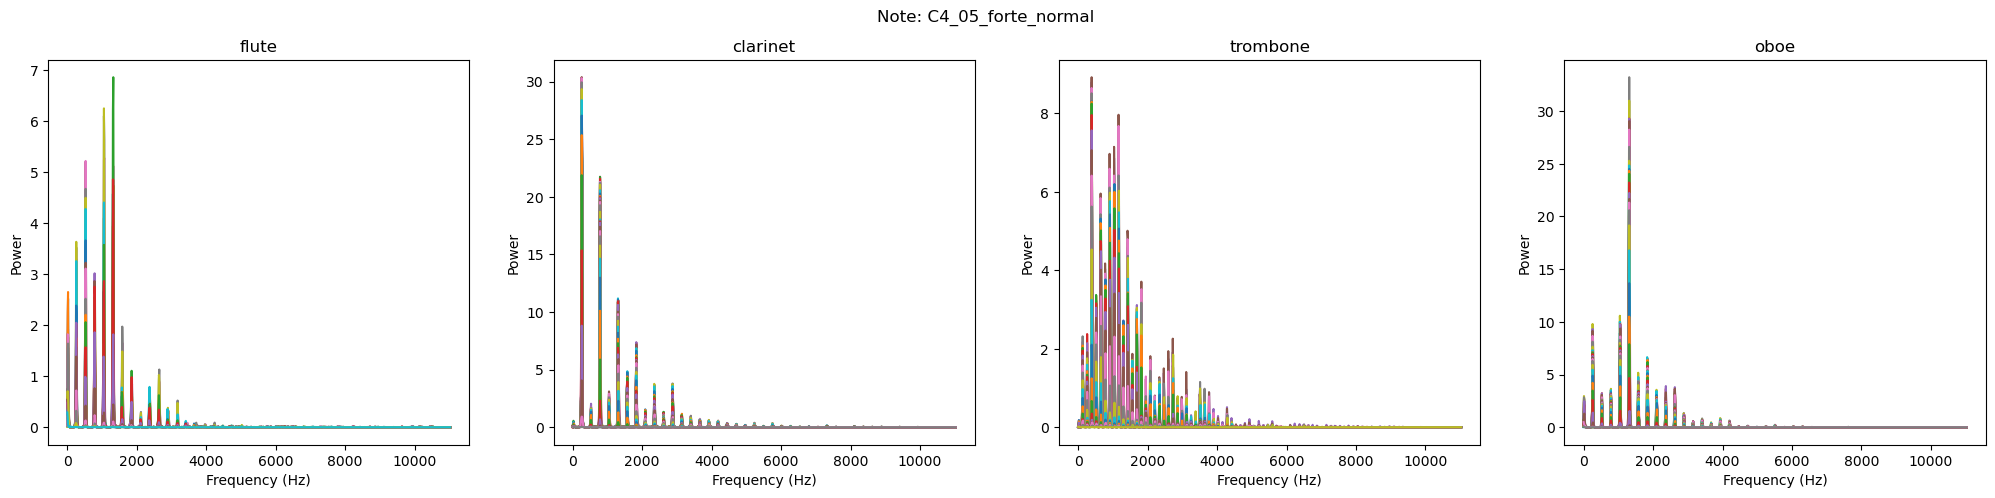

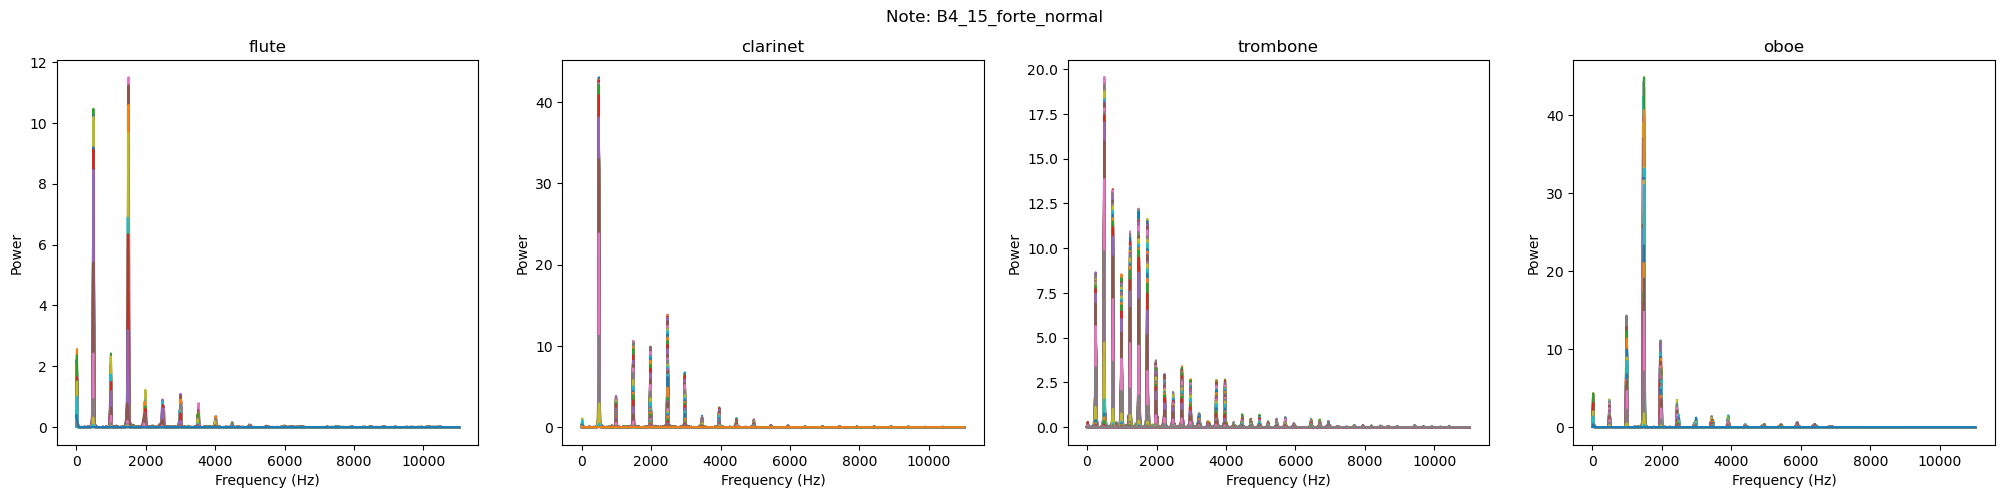

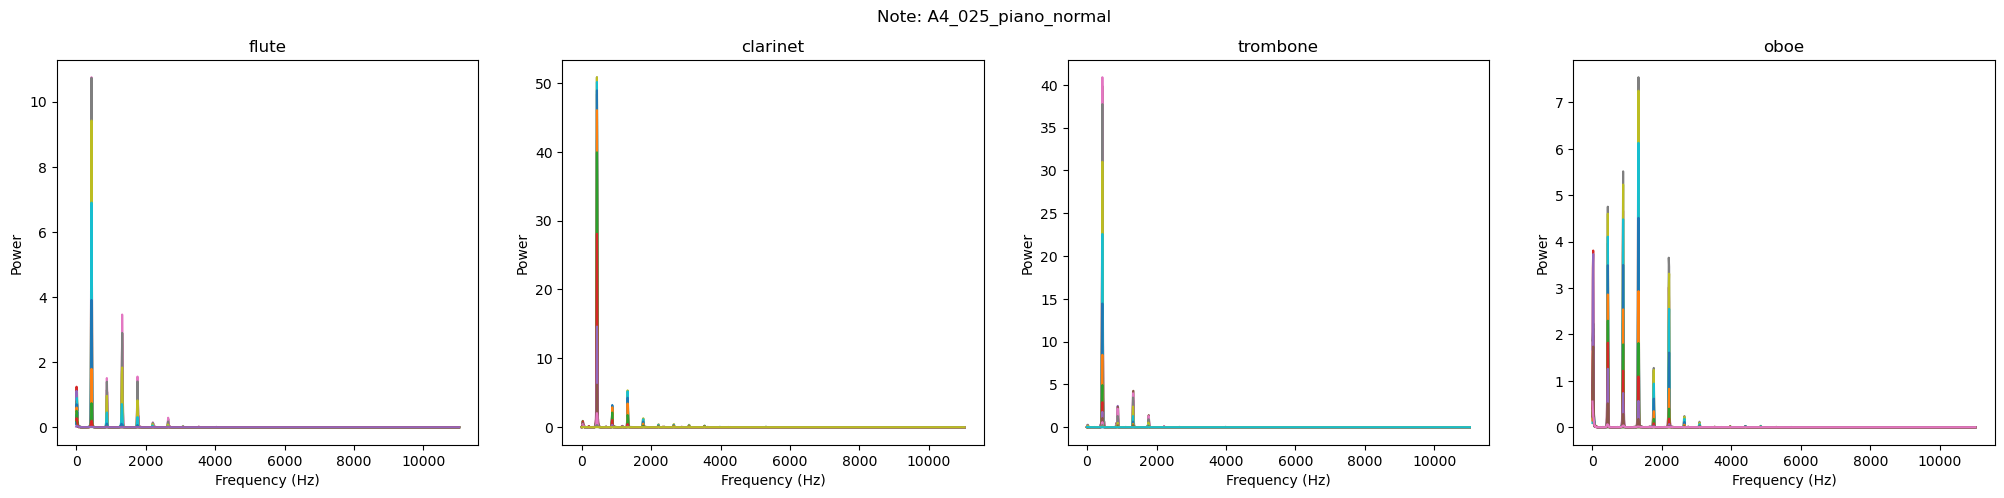

In [17]:
for note in notes: 
  fig, ax = plt.subplots(nrows=1, ncols=len(instruments), figsize=(25,5))
  fig.suptitle(f'Note: {note}')

  for index, instrument in enumerate(instruments):
    path = dataset_path+f"/{instrument}/{instrument}_{note}.mp3"
    ax[index].set_title(instrument)
    
    y, sr = librosa.load(path)
    
    D = librosa.stft(y)  # STFT of y
    
    # harmonic decomposition
    H, P = librosa.decompose.hpss(D)
   
    amplitude = np.abs(H)

    freqs = librosa.fft_frequencies(sr=sr)

   
    
    ax[index].plot(freqs, amplitude)
    ax[index].set_xlabel("Frequency (Hz)")
    ax[index].set_ylabel("Power")


